# Capstone Part 3 - Outliers / EDA 

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [5]:
combhotel_clean_df = pd.read_csv('combhotel_clean_df.csv')

In [6]:
nullcheck = combhotel_clean_df.isnull().sum()
print(nullcheck[nullcheck>0])

Series([], dtype: int64)


In [7]:
combhotel_clean_df.columns

Index(['hotel', 'LeadTime', 'ArrivalDateYear', 'ArrivalDateMonth',
       'ArrivalDateWeekNumber', 'ArrivalDateDayOfMonth',
       'StaysInWeekendNights', 'StaysInWeekNights', 'Adults', 'Children',
       'Babies', 'Meal', 'Country', 'MarketSegment', 'DistributionChannel',
       'IsRepeatedGuest', 'PreviousCancellations',
       'PreviousBookingsNotCanceled', 'ReservedRoomType', 'AssignedRoomType',
       'BookingChanges', 'DepositType', 'Agent', 'Company',
       'DaysInWaitingList', 'CustomerType', 'ADR', 'RequiredCarParkingSpaces',
       'TotalOfSpecialRequests', 'ReservationStatus', 'ReservationStatusDate',
       'ArrivalDate', 'IsCanceled'],
      dtype='object')

In [8]:
combhotel_clean_df.head(3)

,hotel,LeadTime,ArrivalDateYear,ArrivalDateMonth,ArrivalDateWeekNumber,ArrivalDateDayOfMonth,StaysInWeekendNights,StaysInWeekNights,Adults,Children,...,Company,DaysInWaitingList,CustomerType,ADR,RequiredCarParkingSpaces,TotalOfSpecialRequests,ReservationStatus,ReservationStatusDate,ArrivalDate,IsCanceled
0,resort hotel,342,2015,July,27,1,0,0,2,0,...,Not Company,0,Transient,0.0,0,0,Check-Out,2015-07-01,2015-07-01,False
1,resort hotel,737,2015,July,27,1,0,0,2,0,...,Not Company,0,Transient,0.0,0,0,Check-Out,2015-07-01,2015-07-01,False
2,resort hotel,7,2015,July,27,1,0,1,1,0,...,Not Company,0,Transient,75.0,0,0,Check-Out,2015-07-02,2015-07-01,False


columns segregation by datatypes

In [9]:
numerical_columns = ['LeadTime', 'StaysInWeekendNights','StaysInWeekNights','Adults','Children',
                   'Babies','PreviousCancellations','PreviousBookingsNotCanceled', 'BookingChanges',
                   'DaysInWaitingList','ADR','RequiredCarParkingSpaces','TotalOfSpecialRequests']

binary_columns = ['IsCanceled', 'IsRepeatedGuest']

categorical_columns = ['hotel','Meal', 'Country', 'MarketSegment', 'DistributionChannel',
                       'ReservedRoomType', 'AssignedRoomType','DepositType', 'Agent', 'Company',
                       'CustomerType','ReservationStatus']

date_not_datetime_columns = ['ArrivalDateYear','ArrivalDateMonth','ArrivalDateWeekNumber','ArrivalDateDayOfMonth']

datetime_columns = ['ReservationStatusDate','ArrivalDate']

## Descriptive Analysis

In [10]:
combhotel_clean_df[numerical_columns].describe()

,LeadTime,StaysInWeekendNights,StaysInWeekNights,Adults,Children,Babies,PreviousCancellations,PreviousBookingsNotCanceled,BookingChanges,DaysInWaitingList,ADR,RequiredCarParkingSpaces,TotalOfSpecialRequests
count,86944.000000,86944.000000,86944.000000,86944.000000,86944.000000,86944.000000,86944.000000,86944.000000,86944.000000,86944.000000,86944.000000,86944.000000,86944.000000
mean,80.189823,1.007384,2.628727,1.878543,0.139205,0.010835,0.030226,0.176700,0.271842,0.753462,106.571263,0.083445,0.699485
std,86.099761,1.028757,2.043744,0.625858,0.456777,0.113590,0.369566,1.717846,0.728076,10.041586,54.958962,0.280396,0.831835
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000
25%,12.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,72.250000,0.000000,0.000000
50%,50.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,98.400000,0.000000,0.000000
75%,125.000000,2.000000,4.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,134.100000,0.000000,1.000000
max,737.000000,16.000000,41.000000,55.000000,10.000000,10.000000,26.000000,72.000000,21.000000,391.000000,5400.000000,8.000000,5.000000


## Outliers Analysis

In [11]:
for col in combhotel_clean_df[numerical_columns].columns:
    fig = px.box(combhotel_clean_df[numerical_columns], x=col, title=f"{col} boxplot")
    fig.show()

***All numerical features appears to contain outliers. Will go through feature by feature the actions taken for the outliers.***

**LeadTime** - Since lead time in outlier zones appears to have more cancellation rate, it is also possible for some hotels to allow bookings 2 years in advance so possibly not a mistake input, will keep the outlier data points for analysis 

**StaysInWeekendNights** - the outliers could be true inputs as we have to account for long stays that are booked for expats which may require longer stays in the hotel. This are features that we want the model to learn and produce a more reliable model, will keep outliers for modelling purpose  

**StaysInWeekNights**  - Outliers may not be errors. Similar reasons to the outliers for the stays in weekend nights to keep the outlier data points for modelling. It is also shown that cancellation rates are different for points within and not within the outlier zone  

**Adults** - These are legitimate cases for example corporate events where huge number of adults are recorded in the booking. If such group bookings are more (or less) likely to cancel, your model needs to learn that behavior. Removing them could hide an important cancellation pattern.      

**Children** - Outliers reflect real scenarios for bookings by large families. Will show potential cancellation behaviour, removing outliers would remove important signals that can improve predictive powers

**Babies** - Similar reasoning as keeping the number of children outliers

**PreviousCancellations** -  Outliers represent valuable customer behavior patterns, strong predictor of future cancellation behavior, making the feature very informative.Helps the model learn risk profiles. Hence will keep the outliers for modelling. 

**PreviousBookingsNotCanceled** - Similar reasoning to keep outliers in number of previous cancellations

**BookingChanges** -  Outliers are important to reveal distinct customer behaviour and it reflects real and meaningful variability. Furthermore, we found that cancellation rates are different for datapoints in the outlier zone. 

**DaysInWaitingList** -   Outliers captures complex booking scnearios such as high demand periods and overbooked hotels. These cases have different cancellation probabilities. It may show long wait times to have more cancellation risk, which is proven true in the cancellation rate below. 


**ADR** - Found a value that is negative. Negative average daily rate although not an outlier based on the box plot, but seems like a super rare case and illogical data for rates to be negative. Hence will remove the data with negative ADR. However, for the positive ADR, will maintain  as it will show if ADR in outliers are more prone to cancellation. Keeping ADR 0 data as it could be a complimentary stay with no fees involved. the extreme positive outlier will also be removed as it does not represent the general customer behaviour and it may only be a one-off event. 

**RequiredCarParkingSpaces** -  Keeping outliers to simulated real scenarios and to capture trends if this requirement affects bookings

**TotalOfSpecialRequests** -  Keeping outliers as it is important to allow the model to learn on this customer behaviour to predict future bookings

## Comparing Cancelation rates of data points within and not within the outlier zones

In [12]:
# percentage of cancelation for non-outlier lead time 
print("percentage cancelled for lead time not within outlier zone:")
print(round((combhotel_clean_df[combhotel_clean_df['LeadTime'] < 296]['IsCanceled'].mean()),2))
print()
print("percentage cancelled for lead time within outlier zone:")
print(round((combhotel_clean_df[combhotel_clean_df['LeadTime'] > 295]['IsCanceled'].mean()),2))


percentage cancelled for lead time not within outlier zone:
0.27

percentage cancelled for lead time within outlier zone:
0.46


In [13]:
# percentage of cancelation for non-outlier StaysInWeekendNights
print("percentage cancelled for Stays In Weekend Nights not within outlier zone:")
print(round((combhotel_clean_df[combhotel_clean_df['StaysInWeekendNights'] < 6]['IsCanceled'].mean()),2))
print()
print("percentage cancelled for Stays In Weekend Nights within outlier zone:")
print(round((combhotel_clean_df[combhotel_clean_df['StaysInWeekendNights'] > 5]['IsCanceled'].mean()),2))

percentage cancelled for Stays In Weekend Nights not within outlier zone:
0.28

percentage cancelled for Stays In Weekend Nights within outlier zone:
0.51


In [14]:
# percentage of cancelation for non-outlier StaysInWeekNights  
print("percentage cancelled for Stays In Week Nights not within outlier zone:")
print(round((combhotel_clean_df[combhotel_clean_df['StaysInWeekNights'] < 9]['IsCanceled'].mean()),2))
print() 
print("percentage cancelled for Stays In Week Nights within outlier zone:")
print(round((combhotel_clean_df[combhotel_clean_df['StaysInWeekNights'] > 8]['IsCanceled'].mean()),2))

percentage cancelled for Stays In Week Nights not within outlier zone:
0.27

percentage cancelled for Stays In Week Nights within outlier zone:
0.34


In [15]:
# percentage of cancelation for non-outlier BookingChanges 
print("percentage cancelled for booking changes not within outlier zone:")
print(round((combhotel_clean_df[combhotel_clean_df['BookingChanges'] == 0]['IsCanceled'].mean()),2))
print()
print("percentage cancelled for Stays In Week Nights within outlier zone:")
print(round((combhotel_clean_df[combhotel_clean_df['BookingChanges'] > 0]['IsCanceled'].mean()),2))

percentage cancelled for booking changes not within outlier zone:
0.3

percentage cancelled for Stays In Week Nights within outlier zone:
0.15


In [16]:
# percentage of cancelation for non-outlier DaysInWaitingList
print("percentage cancelled for DaysInWaitingList not within outlier zone:")
print(round((combhotel_clean_df[combhotel_clean_df['DaysInWaitingList'] == 0]['IsCanceled'].mean()),2))
print()
print("percentage cancelled for DaysInWaitingList within outlier zone:")
print(round((combhotel_clean_df[combhotel_clean_df['DaysInWaitingList'] > 0]['IsCanceled'].mean()),2))

percentage cancelled for DaysInWaitingList not within outlier zone:
0.28

percentage cancelled for DaysInWaitingList within outlier zone:
0.34


Data Cleaning to remove rows with negative ADR

In [17]:
# removing datapoint with negative ADR 
combhotel_clean_df = combhotel_clean_df[(combhotel_clean_df['ADR']>=0) & (combhotel_clean_df['ADR']<5400)]

In [18]:
# percentage of cancelation for non-outlier RequiredCarParkingSpaces
print("percentage cancelled for RequiredCarParkingSpaces not within outlier zone:")
print(round((combhotel_clean_df[combhotel_clean_df['RequiredCarParkingSpaces'] == 0]['IsCanceled'].mean()),2))
print()
print("percentage cancelled for RequiredCarParkingSpaces within outlier zone:")
print(round((combhotel_clean_df[combhotel_clean_df['RequiredCarParkingSpaces'] > 0]['IsCanceled'].mean()),2))

percentage cancelled for RequiredCarParkingSpaces not within outlier zone:
0.3

percentage cancelled for RequiredCarParkingSpaces within outlier zone:
0.0


Further data cleaning upon realising there is undefined value in market segment column

In [19]:
# notice market segment has undefined value
combhotel_clean_df.MarketSegment.value_counts()

MarketSegment
Online TA        51544
Offline TA/TO    13856
Direct           11648
Groups            4936
Corporate         4031
Complementary      698
Aviation           227
Undefined            2
Name: count, dtype: int64

In [20]:
combhotel_clean_df.IsCanceled.value_counts()

IsCanceled
False    62952
True     23990
Name: count, dtype: int64

since there is only 2 rows of 'undefined' market segment, will decide to delete the row as it will not affect the quality of the final analysis

In [21]:
combhotel_clean_df = combhotel_clean_df[combhotel_clean_df['MarketSegment']!="Undefined"]

In [22]:
# Noticed distribution channel has undefined values

combhotel_clean_df.DistributionChannel.value_counts()

DistributionChannel
TA/TO        69027
Direct       12826
Corporate     4903
GDS            181
Undefined        3
Name: count, dtype: int64

since there is only 3 rows of 'undefined' distribution channel, will decide to delete the row as it will not affect the quality of the final analysis

In [23]:
combhotel_clean_df = combhotel_clean_df[combhotel_clean_df['DistributionChannel']!="Undefined"]

In [24]:
combhotel_clean_df.shape

(86937, 33)

In [25]:

combhotel_clean_df.DistributionChannel.value_counts()

DistributionChannel
TA/TO        69027
Direct       12826
Corporate     4903
GDS            181
Name: count, dtype: int64

## Trend Visualisation on Python

count plot on cancelled vs non-cancelled bookings on different hotels

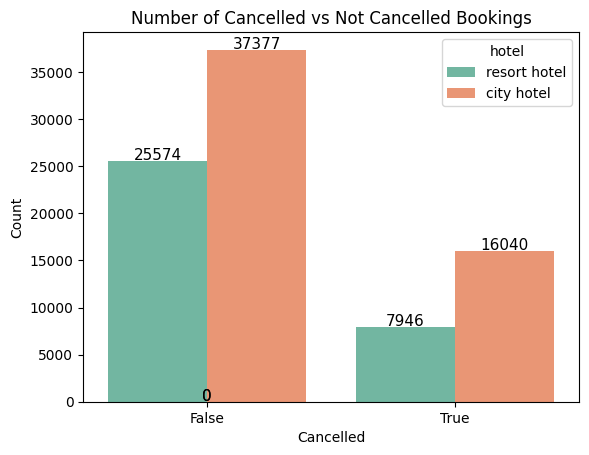

In [26]:
# Count plot
ax = sns.countplot(x='IsCanceled', hue = 'hotel', data=combhotel_clean_df, palette='Set2')
plt.title('Number of Cancelled vs Not Cancelled Bookings')
plt.ylabel('Count')
plt.xlabel('Cancelled')

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2., height + 100, f'{int(height)}', ha='center', fontsize=11)

plt.show()

Comparing Average Daily Rate against cancellation count

In [27]:
combhotel_clean_df.head()

,hotel,LeadTime,ArrivalDateYear,ArrivalDateMonth,ArrivalDateWeekNumber,ArrivalDateDayOfMonth,StaysInWeekendNights,StaysInWeekNights,Adults,Children,...,Company,DaysInWaitingList,CustomerType,ADR,RequiredCarParkingSpaces,TotalOfSpecialRequests,ReservationStatus,ReservationStatusDate,ArrivalDate,IsCanceled
0,resort hotel,342,2015,July,27,1,0,0,2,0,...,Not Company,0,Transient,0.0,0,0,Check-Out,2015-07-01,2015-07-01,False
1,resort hotel,737,2015,July,27,1,0,0,2,0,...,Not Company,0,Transient,0.0,0,0,Check-Out,2015-07-01,2015-07-01,False
2,resort hotel,7,2015,July,27,1,0,1,1,0,...,Not Company,0,Transient,75.0,0,0,Check-Out,2015-07-02,2015-07-01,False
3,resort hotel,13,2015,July,27,1,0,1,1,0,...,Not Company,0,Transient,75.0,0,0,Check-Out,2015-07-02,2015-07-01,False
4,resort hotel,14,2015,July,27,1,0,2,2,0,...,Not Company,0,Transient,98.0,0,1,Check-Out,2015-07-03,2015-07-01,False


Creatiing new 'ADR_bin' column for visualisation

In [28]:
# Step 1: Bin ADR into intervals
bins = [0, 50, 100, 150, 200, 250, 300, 350, 400, 450, 500, 550]
labels = ['0-50', '51-100', '101-150', '151-200', '201-250', '251-300','301-350','351-400', '401-450', '451-500', '501-550']
combhotel_clean_df['ADR_bin'] = pd.cut(combhotel_clean_df['ADR'], bins=bins, labels=labels, include_lowest=True)

# Aggregate counts
agg_df = combhotel_clean_df.groupby('ADR_bin')['IsCanceled'].agg(['sum', 'count']).reset_index()
agg_df['Not_Cancelled'] = agg_df['count'] - agg_df['sum']

# Calculate proportions
agg_df['Cancelled_pct'] = agg_df['sum'] / agg_df['count']
agg_df['Not_Cancelled_pct'] = agg_df['Not_Cancelled'] / agg_df['count']

C:\Users\yingw\AppData\Local\Temp\ipykernel_6676\3747169167.py:7: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



In [29]:
agg_df

,ADR_bin,sum,count,Not_Cancelled,Cancelled_pct,Not_Cancelled_pct
0,0-50,1454,9574,8120,0.151870,0.848130
1,51-100,8745,35688,26943,0.245040,0.754960
2,101-150,8489,26595,18106,0.319195,0.680805
3,151-200,3527,10373,6846,0.340017,0.659983
4,201-250,1319,3491,2172,0.377829,0.622171
5,251-300,367,957,590,0.383490,0.616510
6,301-350,68,207,139,0.328502,0.671498
7,351-400,15,45,30,0.333333,0.666667
8,401-450,2,4,2,0.500000,0.500000
9,451-500,0,1,1,0.000000,1.000000


Below stack column chart shows that as ADR increases, cancellation rate follows an increasing trend. 

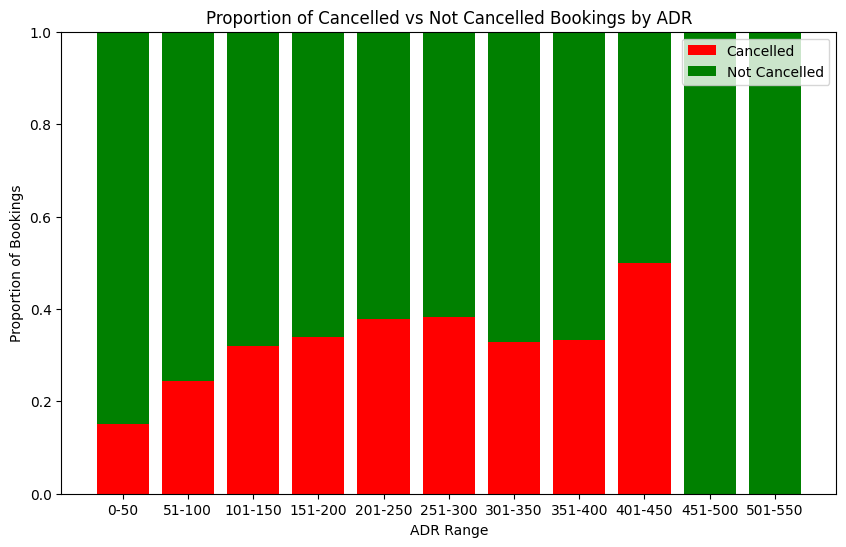

In [30]:
plt.figure(figsize=(10,6))

# Plot Cancelled proportion
plt.bar(agg_df['ADR_bin'], agg_df['Cancelled_pct'], color='red', label='Cancelled')

# Plot Not Cancelled proportion on top
plt.bar(agg_df['ADR_bin'], agg_df['Not_Cancelled_pct'], bottom=agg_df['Cancelled_pct'], color='green', label='Not Cancelled')

plt.ylabel('Proportion of Bookings')
plt.xlabel('ADR Range')
plt.title('Proportion of Cancelled vs Not Cancelled Bookings by ADR')
plt.legend()
plt.ylim(0,1)  # 100% chart
plt.show()

Repeated guests has lower cancellation rates

In [31]:
agg_df = combhotel_clean_df.groupby('IsRepeatedGuest')['IsCanceled'].agg(['sum', 'count']).reset_index()
agg_df['canceled_rate'] = agg_df['sum']/agg_df['count']
agg_df

,IsRepeatedGuest,sum,count,canceled_rate
0,False,23725,83527,0.28404
1,True,261,3410,0.07654


Text(0, 0.5, 'Percentage of Cancelled')

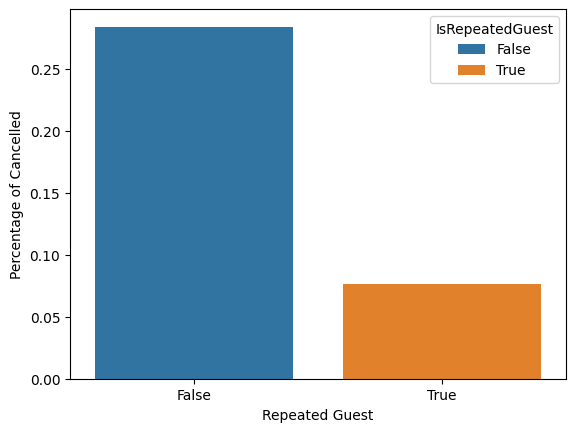

In [32]:
ax = sns.barplot((agg_df), x="IsRepeatedGuest", y="canceled_rate", hue = 'IsRepeatedGuest')
ax.set_xlabel("Repeated Guest")
ax.set_ylabel("Percentage of Cancelled")

## Feature Engineering

Noticed that not all customers were given the same room type as per their booking, hence will create a new column to check

In [33]:
combhotel_clean_df[['ReservedRoomType','AssignedRoomType']]

,ReservedRoomType,AssignedRoomType
0,C,C
1,C,C
2,A,C
3,A,A
4,A,A
...,...,...
86939,A,A
86940,E,E
86941,D,D
86942,A,A


In [34]:
# defining function to identify if customer got the exact room that they booked
def check_assign_room (row):
    if row['ReservedRoomType'] == row['AssignedRoomType']:
        return 1
    else:
        return 0

In [35]:
combhotel_clean_df['got_assigned_room'] = combhotel_clean_df.apply(check_assign_room, axis=1)

In [36]:
# converting new column to boolean
combhotel_clean_df['got_assigned_room'] = combhotel_clean_df.got_assigned_room.astype(bool)

In [37]:
combhotel_clean_df.sample(3)

,hotel,LeadTime,ArrivalDateYear,ArrivalDateMonth,ArrivalDateWeekNumber,ArrivalDateDayOfMonth,StaysInWeekendNights,StaysInWeekNights,Adults,Children,...,CustomerType,ADR,RequiredCarParkingSpaces,TotalOfSpecialRequests,ReservationStatus,ReservationStatusDate,ArrivalDate,IsCanceled,ADR_bin,got_assigned_room
37312,city hotel,119,2016,February,7,10,0,3,2,0,...,Transient,81.0,0,1,Canceled,2016-02-04,2016-02-10,True,51-100,True
14495,resort hotel,2,2015,December,49,5,2,1,2,0,...,Transient,48.0,0,1,Check-Out,2015-12-08,2015-12-05,False,0-50,False
7021,resort hotel,46,2016,November,47,18,0,2,2,0,...,Transient,37.8,0,2,Canceled,2016-10-16,2016-11-18,True,0-50,True


## Checking if dataset is imbalance

In [39]:
combhotel_clean_df.IsCanceled.value_counts()

IsCanceled
False    62951
True     23986
Name: count, dtype: int64

In [40]:
print (23986/(62951+23986))

0.27590093976097635


In [ ]:
# exporting another clean dataframe for futher EDA and visualisation
combhotel_clean_df.to_csv('combhotel_clean_df_v2.csv', index = False)

## Continuing more visualisation on Tableau...